In [1]:
import numpy as np
import pandas as pd
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [2]:
info = mysql.connector.connect (
    host = "localhost",
    user = "root",
    password = "@Li_123456",
    database = "spotify"
)

In [3]:
my_cursor = info.cursor()
my_cursor.execute(
                    "select artist_name, popularity, followers, genres_name \
                        from artist \
                        join artist_genre as ag on ag.artist_id = artist.artist_id \
                        join genre on genre.genre_id = ag.genre_id"
                   )

RESULT = my_cursor.fetchall()

RESULT_df = pd.DataFrame(RESULT, columns= ["artist_name", "popularity", "followers", "genre"])

data = RESULT_df.drop(['artist_name'], axis= 1)


In [4]:
label_encoder = LabelEncoder()

data['genre'] = label_encoder.fit_transform(data['genre'])

data


,popularity,followers,genre
0,78,20348703,1463
1,74,7620554,1463
2,86,50069856,1463
3,79,12207292,1463
4,82,16087845,1463
...,...,...,...
21157,53,461003,989
21158,38,123945,937
21159,38,123945,1133
21160,38,123945,1769


In [5]:
X = data[['followers', 'genre']]  
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state = 30)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 190.923924739889
Root Mean Squared Error: 13.817522380654536
R-squared (R2) Score: 0.2422248352816091


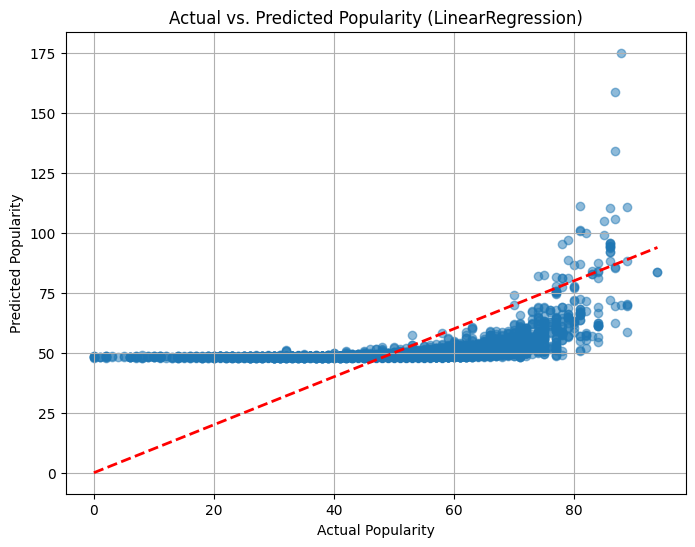

In [7]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.title('Actual vs. Predicted Popularity (LinearRegression)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.grid(True)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

In [8]:

random_forest = RandomForestRegressor(n_estimators = 100, random_state = 30) 
random_forest.fit(X_train, y_train)

y_predict = random_forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_predict)
r2_forest = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse_forest}')
print(f'R-squared (R2): {r2_forest}')


Mean Squared Error: 41.16617503771951
R-squared (R2): 0.8366118593438037


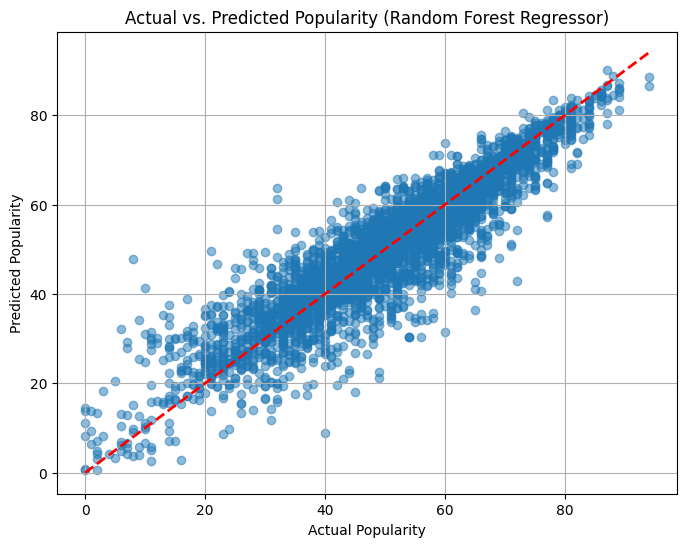

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.title('Actual vs. Predicted Popularity (Random Forest Regressor)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.grid(True)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()
